### **COVID-19 Detection Model**

**COVID-19** was declared as a Pandemic by WHO on March 11, 2020. This pandemic attacks respiratory system, causes severe illness. There is an ongoing increase in the number of cases day-by-day across the globe. To get protected from COVID wearing masks, maintaining social distance and applying santiziation thoroughly is essential and need to be habituated.

**Problem Statement:**

COVID-19 test kits are in short supply and they cann't be manufactured fast enough, which is a panic cause and there is a need to rely on other diagnosis measures like exploring X-ray images as doctors frequently use X-rays and CT scans to diagnose pneumonia, lung inflammation, abscesses, and/or enlarged lymph nodes. Since COVID-19 attacks the epithelial cells that line our respiratory tract, we can go for X-rays to analyze the health of a patient’s lungs.

And given that nearly all hospitals have X-ray imaging machines, it could be possible to use X-rays to test for COVID-19 without going for dedicated test kits.A drawback is that X-ray analysis requires a radiology expert and takes significant time — which is precious when people are sick around the world. Therefore developing an automated analysis system is required to save medical professionals valuable time.

**Dataset**:

COVID-19 Chest-Xray Dataset

**Objective:**

Goal of this usecase is to detect COVID-19 on given X-ray images using **Deep Learning**/**Computer Vision**

In [1]:
#import os
#!unzip Covid-19-Datset.zip

# **1. Import Libraries**

In [2]:
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
import seaborn as sns
!pip install pydicom
import pydicom as dcm
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore') 
IS_LOCAL = True
import os


You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/python -m pip install --upgrade pip' command.


# **2. Generate Train and Test sets**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_datagen.flow_from_directory(
        'Covid-19-Datset/CovidDataset/Train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224x224
        batch_size=16,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 224 images belonging to 2 classes.


In [5]:
valid_data = test_datagen.flow_from_directory(
        'Covid-19-Datset/CovidDataset/Val',
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary')

Found 60 images belonging to 2 classes.


# **3. Build CNN Model**

In [6]:
img_width = 224
img_height = 224
IMAGE_SIZE=224
kernel =3
num_of_classes =2
BATCH_SIZE = 16
EPOCHS = 4
SHUFFLE_BUFFER_SIZE=1000
input_shape = (img_width, img_height, kernel)

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16, ResNet50
from keras.models import Model
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)        0         
__________

# **4. Compile Model**

In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Early Stopping**

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
## Earlystopping
earlystop = EarlyStopping(monitor='val_loss', patience=15)

## Model Check point
filepath="weights/COVID-DETECT-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only = True)


# **5. Fit Model**

In [11]:
results = model.fit_generator(train_data, epochs=30, callbacks=[earlystop, checkpoint],
                              steps_per_epoch= 10, validation_steps=10, validation_data= valid_data, verbose=1)




Epoch 1/30





10/10 [==============================] - 60s 6s/step - loss: 0.8091 - acc: 0.5000 - val_loss: 0.6696 - val_acc: 0.5921

Epoch 00001: val_loss improved from inf to 0.66957, saving model to weights/COVID-DETECT-01-0.59.hdf5
Epoch 2/30
10/10 [==============================] - 50s 5s/step - loss: 0.6540 - acc: 0.6250 - val_loss: 0.5578 - val_acc: 0.9257

Epoch 00002: val_loss improved from 0.66957 to 0.55776, saving model to weights/COVID-DETECT-02-0.93.hdf5
Epoch 3/30
10/10 [==============================] - 50s 5s/step - loss: 0.5466 - acc: 0.7000 - val_loss: 0.4611 - val_acc: 0.9211

Epoch 00003: val_loss improved from 0.55776 to 0.46111, saving model to weights/COVID-DETECT-03-0.92.hdf5
Epoch 4/30
10/10 [==============================] - 49s 5s/step - loss: 0.3942 - acc: 0.8063 - val_loss: 0.2315 - val_acc: 0.9324

Epoch 00004: val_loss improved from 0.46111 to 0.23154, saving model to weights/COVID-DETECT-04-0.93.hdf5
Epoch 5/30
10/10 [==============================

**Conclusion**:

Considering Model with weights of below metrics
*   Epoch: **15**
*   Training Accuracy: **94.37%**
*   Validation Loss: **0.05345**
*   Validation Accuracy: **98.68**%

# **6. Load the Best weighted model**

In [12]:
#model.load_weights('weights/COVID-DETECT-15-0.99.hdf5')

# **7. Predict Xray Images**

In [13]:
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(train_data.class_indices)

{'Covid': 0, 'Normal': 1}


Populating the interactive namespace from numpy and matplotlib


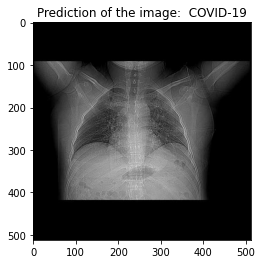

In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('Covid-19-Datset/CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg')
imgplot = plt.imshow(img)

test_image = image.load_img('Covid-19-Datset/CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID-19'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction of the image:  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


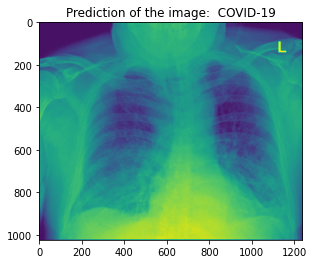

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('Covid-19-Datset/CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('Covid-19-Datset/CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID-19'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction of the image:  '+ prediction )

#There we will test this following image, COVID-19 positive

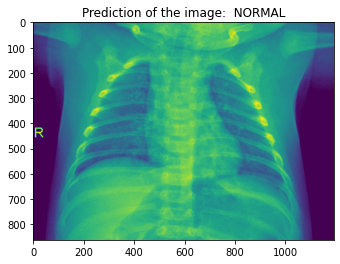

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('Covid-19-Datset/CovidDataset/Val/Normal/NORMAL2-IM-0535-0001-0002.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('Covid-19-Datset/CovidDataset/Val/Normal/NORMAL2-IM-0535-0001-0002.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID=19'
    
plt=plt.title('Prediction of the image:  '+ prediction )

# **8. Plot History**

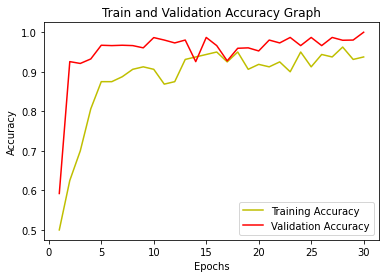

In [20]:
from matplotlib import pyplot as plt
acc = results.history['acc']
val_acc = results.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

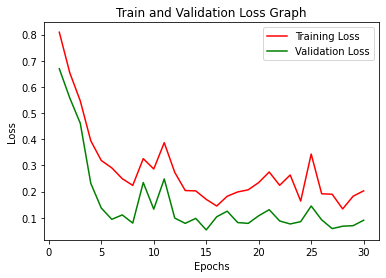

In [21]:
train_loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Train and Validation Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()